# Modelos de regrecion lineal
## Modelo con datos simulados
* y=a+b*x
* x: 100 valores distribuidos segun un
* N(1.5,2.5)
* Ye=5+1.9*x+e
* e estara distribuido segun una N(0,0.8)



In [1]:
import numpy as np
import pandas as pd


In [2]:
x=1.5+2.5*np.random.randn(100)


In [3]:
res=0+0.8*np.random.randn(100)

In [4]:
y_pred=5+1.9*x

In [5]:
y_act=5+1.9*x+res

In [6]:
x_list=x.tolist()
y_pred_list=y_pred.tolist()
y_act_list=y_act.tolist()

In [7]:
data=pd.DataFrame(
 {
     "X":x_list,
     "y_actual":y_act_list,
     "y_prediccion":y_pred_list
 }
)

In [8]:
data.head()

,X,y_actual,y_prediccion
0,-2.188764,0.259723,0.841348
1,5.313332,15.701119,15.095331
2,2.381263,7.978108,9.524401
3,2.627396,9.212006,9.992053
4,2.983474,11.772974,10.668600


In [9]:
import matplotlib.pyplot as plt

In [10]:
y_mean=[np.mean(y_act) for i in range(1,len(x_list)+1)]

Text(0.5, 1.0, 'Valor actual vs prediccion')

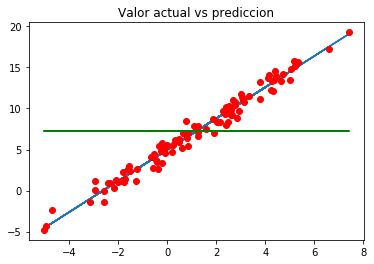

In [11]:
%matplotlib inline
plt.plot(x,y_pred)
plt.plot(x,y_act,"ro")
plt.plot(x,y_mean,"g")
plt.title("Valor actual vs prediccion")

In [12]:
#Suma cuadrados de la regresion
data["SSR"]=(data["y_prediccion"]-np.mean(y_act))**2
#suma de  los cuadrados de las diferencias 
data["SSD"]=(data["y_prediccion"]-data["y_actual"])**2
#suma de  totales 
data["SST"]=(data["y_actual"]-np.mean(y_act))**2

In [13]:
data.head()

,X,y_actual,y_prediccion,SSR,SSD,SST
0,-2.188764,0.259723,0.841348,41.239429,0.338288,49.047874
1,5.313332,15.701119,15.095331,61.343196,0.366979,71.199470
2,2.381263,7.978108,9.524401,5.113292,2.391019,0.511178
3,2.627396,9.212006,9.992053,7.446957,0.608474,3.798071
4,2.983474,11.772974,10.668600,11.597149,1.219641,20.338585


In [14]:
SSR=sum(data["SSR"])
SSD=sum(data["SSD"])
SST=sum(data["SST"])

In [15]:
SSR

2432.2069796691135

In [16]:
SSD

60.709597302101855

In [17]:
SST

2479.4664457963304

In [18]:
SSR+SSD

2492.9165769712154

In [19]:
R2=SSR/SST

In [20]:
R2

0.9809396629636428

(array([ 2.,  1.,  9., 13., 24., 15., 13.,  9.,  7.,  7.]),
 array([-2.04394526, -1.67187934, -1.29981342, -0.9277475 , -0.55568158,
        -0.18361566,  0.18845026,  0.56051619,  0.93258211,  1.30464803,
         1.67671395]),
 <a list of 10 Patch objects>)

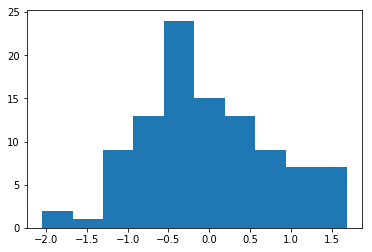

In [21]:
plt.hist(data["y_prediccion"]-data["y_actual"])

In [23]:
x_mean = np.mean(data["X"])
y_mean = np.mean(data["y_actual"])
x_mean, y_mean

(1.171946521314136, 7.263141567375418)

In [24]:
data["beta_n"] = (data["X"]-x_mean)*(data["y_actual"]-y_mean)
data["beta_d"] = (data["X"]-x_mean)**2

In [25]:
beta = sum(data["beta_n"])/sum(data["beta_d"])

In [26]:
alpha = y_mean - beta * x_mean

In [27]:
alpha, beta

(5.042478750936178, 1.8948499577857438)

El modelo lineal obtenido por regresión es:
y = 5.042341442370516 + 1.9044490309709992 * x

In [29]:
data["y_model"] = alpha + beta * data["X"]

In [30]:
data.head()

,X,y_actual,y_prediccion,SSR,SSD,SST,beta_n,beta_d,y_model
0,-2.188764,0.259723,0.841348,41.239429,0.338288,49.047874,23.536464,11.294376,0.895099
1,5.313332,15.701119,15.095331,61.343196,0.366979,71.199470,34.944921,17.151076,15.110446
2,2.381263,7.978108,9.524401,5.113292,2.391019,0.511178,0.864622,1.462447,9.554616
3,2.627396,9.212006,9.992053,7.446957,0.608474,3.798071,2.836474,2.118334,10.021000
4,2.983474,11.772974,10.668600,11.597149,1.219641,20.338585,8.169684,3.281631,10.695714


In [31]:
SSR = sum((data["y_model"]-y_mean)**2)
SSD = sum((data["y_model"]-data["y_actual"])**2)
SST = sum((data["y_actual"]-y_mean)**2)

In [32]:
SSR, SSD, SST

(2418.9075276356534, 60.558918160678054, 2479.4664457963304)

In [33]:
R2 = SSR / SST
R2

0.9755758267012049

Text(0.5, 1.0, 'Valor Actual vs Predicción')

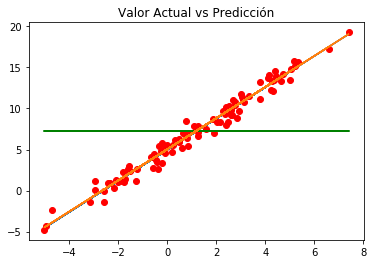

In [35]:
y_mean = [np.mean(y_act) for i in range(1, len(x_list) + 1)]

%matplotlib inline
plt.plot(data["X"],data["y_prediccion"])
plt.plot(data["X"], data["y_actual"], "ro")
plt.plot(data["X"],y_mean, "g")
plt.plot(data["X"], data["y_model"])
plt.title("Valor Actual vs Predicción")

## Error estándar de los residuos (RSE)

In [36]:
RSE = np.sqrt(SSD/(len(data)-2))
RSE

0.7860967780729767

In [37]:
np.mean(data["y_actual"])

7.263141567375418

In [38]:
RSE / np.mean(data["y_actual"])

0.10823095912159644